In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
#import statsmodels.api as sm

In [9]:
# Load the dataset
df = pd.read_csv('C:/Users/Shreya/Downloads/MLR/MLR/ToyotaCorolla - MLR.csv')
print(df)

      Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3  

In [11]:
# Drop the Cylinders and Gears columns
df = df.drop(columns=['Cylinders', 'Gears'])

# Rename the columns for clarity
df = df.rename(columns={
    'Age_08_04': 'Age',
    'cc': 'CC'
})
print(df)

      Price  Age     KM Fuel_Type   HP  Automatic    CC  Doors  Weight
0     13500   23  46986    Diesel   90          0  2000      3    1165
1     13750   23  72937    Diesel   90          0  2000      3    1165
2     13950   24  41711    Diesel   90          0  2000      3    1165
3     14950   26  48000    Diesel   90          0  2000      3    1165
4     13750   30  38500    Diesel   90          0  2000      3    1170
...     ...  ...    ...       ...  ...        ...   ...    ...     ...
1431   7500   69  20544    Petrol   86          0  1300      3    1025
1432  10845   72  19000    Petrol   86          0  1300      3    1015
1433   8500   71  17016    Petrol   86          0  1300      3    1015
1434   7250   70  16916    Petrol   86          0  1300      3    1015
1435   6950   76      1    Petrol  110          0  1600      5    1114

[1436 rows x 9 columns]


In [13]:
# Display summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
              Price          Age             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                CC        Doors      Weight  
count   1436.00000  1436.000000  1436.00000  
mean    1576.85585     4.033426  1072.45961  
std      424.38677     0.952677    52.64112  
min     1300.00000     2.000000  1000.00000  
25%     1400.00000     3.000000  1040.00000  
50%     16

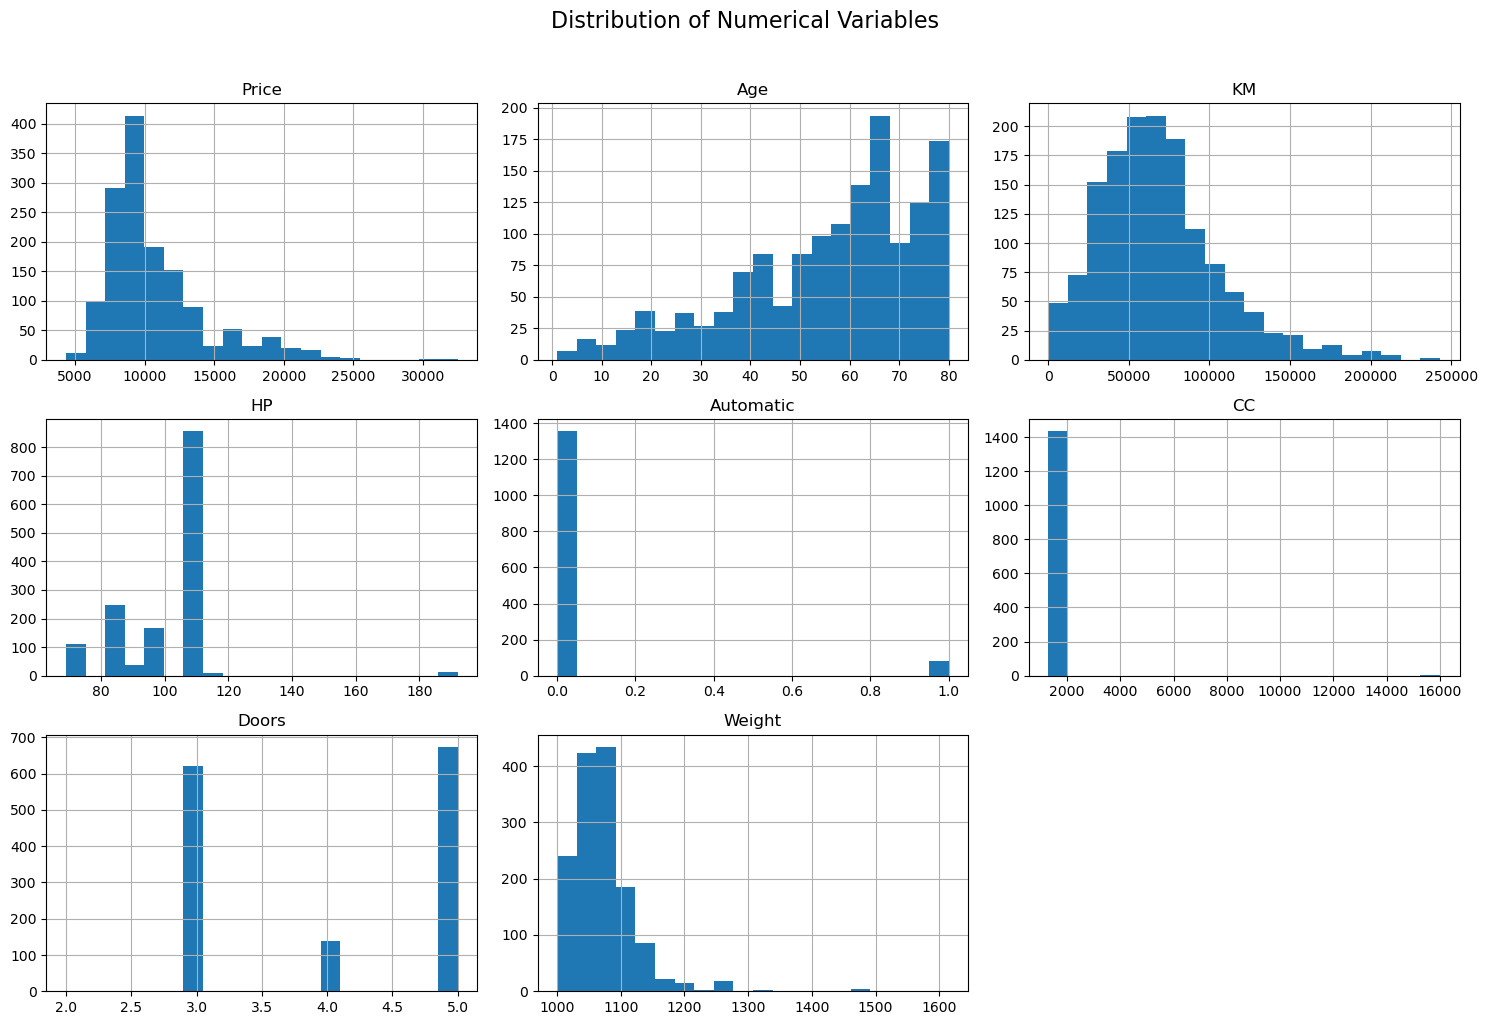

In [15]:
# EDA - Visualizations
# Create histograms for numerical variables
numerical_cols = ['Price', 'Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight']
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables', y=1.02, fontsize=16)
plt.tight_layout()

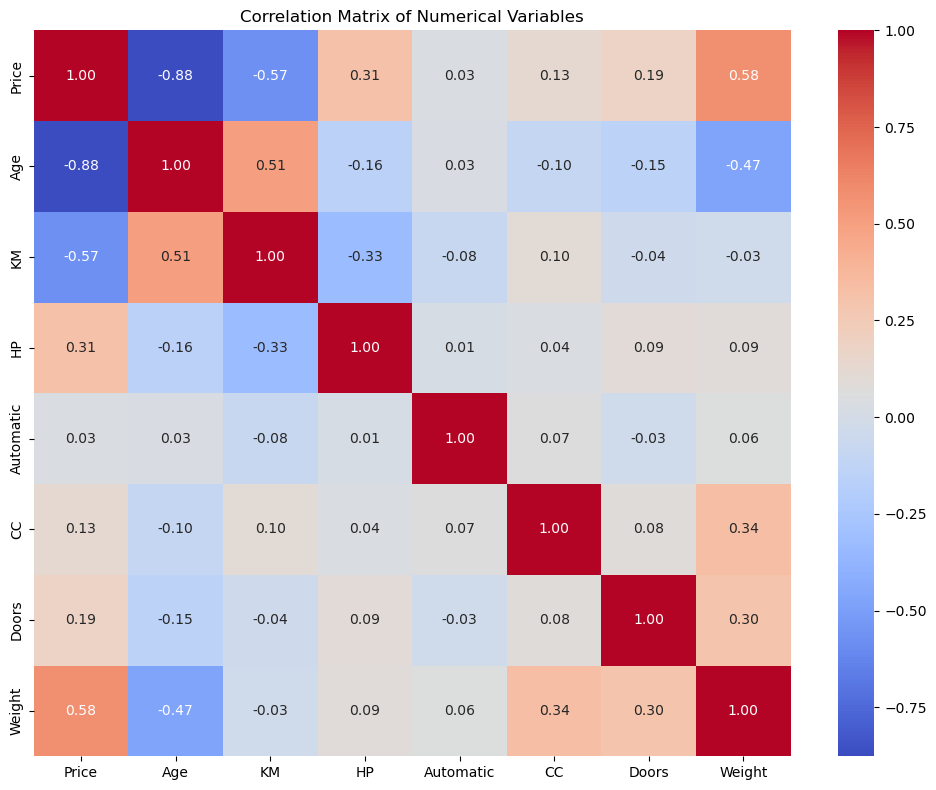

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()

In [35]:
#The data shows that older cars and cars with more kilometers generally have a lower price. This is evident from the strong negative correlation of -0.88 for Age and -0.71 for KM with Price.
#The price is positively correlated with the car's Weight (0.58) and HP (0.31).
#The majority of the cars in the dataset are Petrol, followed by Diesel, while CNG cars are the least frequent.

In [19]:
# Check for the distribution of the categorical variable 'Fuel_Type'
print("\nDistribution of 'Fuel_Type':")
print(df['Fuel_Type'].value_counts())


Distribution of 'Fuel_Type':
Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64


In [21]:
# Convert the categorical variable `Fuel_Type` to numerical
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Define the dependent variable
y = df_encoded['Price']

# Define the independent variables for Model 1 (Full Model)
X1 = df_encoded.drop(columns=['Price'])

In [41]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [43]:
# ---- MODEL 1: FULL MODEL ----
print("---- Model 1: Full Model ----")
#This model will include all available features: Age, KM, HP, Automatic, CC, Doors, Weight, and the one-hot encoded Fuel_Type variables.

# Build and train the model using sklearn
model1_sk = LinearRegression()
model1_sk.fit(X1_train, y_train)

# Interpret the coefficients
print("\nCoefficients (from sklearn):")
coef_df1 = pd.DataFrame(model1_sk.coef_, X1_train.columns, columns=['Coefficient'])
print(coef_df1)

# Predict on the testing set
y1_pred = model1_sk.predict(X1_test)

# Evaluate the model
r2_1 = r2_score(y_test, y1_pred)
mae_1 = mean_absolute_error(y_test, y1_pred)
mse_1 = mean_squared_error(y_test, y1_pred)

print(f"\nR-squared: {r2_1:.4f}")
print(f"Mean Absolute Error (MAE): {mae_1:.2f}")
print(f"Mean Squared Error (MSE): {mse_1:.2f}")

---- Model 1: Full Model ----

Coefficients (from sklearn):
                  Coefficient
Age               -120.823078
KM                  -0.015927
HP                  15.777213
Automatic           93.081993
CC                  -0.030236
Doors              -84.483547
Weight              26.069186
Fuel_Type_Diesel     4.202110
Fuel_Type_Petrol  1453.694461

R-squared: 0.8333
Mean Absolute Error (MAE): 992.30
Mean Squared Error (MSE): 2224306.04


In [45]:
#This model1 included all available features. It had an R-squared of 0.8333, an MAE of 992.30 euros, and an MSE of 2,224,306.04 euros.

#Coefficients: Age (-120.82), KM (-0.016), HP (15.78), and Weight (26.07) are the most impactful features.

In [47]:
# ---- MODEL 2: HIGH-CORRELATION FEATURES ----
print("\n---- Model 2: High-Correlation Features ----")
#This model will focus on the features most highly correlated with Price: Age, KM, HP, Weight, and the one-hot encoded Fuel_Type variables.
high_corr_features = ['Age', 'KM', 'HP', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
X2 = df_encoded[high_corr_features]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Build and train the model
model2_sk = LinearRegression()
model2_sk.fit(X2_train, y2_train)

# Interpret the coefficients
print("\nCoefficients (from sklearn):")
coef_df2 = pd.DataFrame(model2_sk.coef_, X2_train.columns, columns=['Coefficient'])
print(coef_df2)

# Predict on the testing set
y2_pred = model2_sk.predict(X2_test)

# Evaluate the model
r2_2 = r2_score(y2_test, y2_pred)
mae_2 = mean_absolute_error(y2_test, y2_pred)
mse_2 = mean_squared_error(y2_test, y2_pred)

print(f"\nR-squared: {r2_2:.4f}")
print(f"Mean Absolute Error (MAE): {mae_2:.2f}")
print(f"Mean Squared Error (MSE): {mse_2:.2f}")


---- Model 2: High-Correlation Features ----

Coefficients (from sklearn):
                  Coefficient
Age               -120.665034
KM                  -0.016237
HP                  16.258363
Weight              25.257766
Fuel_Type_Diesel    54.190978
Fuel_Type_Petrol  1419.662714

R-squared: 0.8339
Mean Absolute Error (MAE): 1001.28
Mean Squared Error (MSE): 2216120.64


In [49]:
#This model2 used a refined set of features that showed the highest correlation with Price. It performed slightly better than the full model, with an R-squared of 0.8339, an MAE of 1001.28 euros, and an MSE of 2,216,120.64 euros. This demonstrates that a simpler model with fewer, more relevant features can be as effective, or even more effective, than a complex one.

In [51]:
# ---- MODEL 3: SIMPLIFIED MODEL ----
print("\n---- Model 3: Simplified Model ----")
#This model will include a smaller set of features to see how a simplified model performs: Age, KM, Weight, and the one-hot encoded Fuel_Type variables.
simple_features = ['Age', 'KM', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
X3 = df_encoded[simple_features]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# Build and train the model
model3_sk = LinearRegression()
model3_sk.fit(X3_train, y3_train)

# Interpret the coefficients
print("\nCoefficients (from sklearn):")
coef_df3 = pd.DataFrame(model3_sk.coef_, X3_train.columns, columns=['Coefficient'])
print(coef_df3)

# Predict on the testing set
y3_pred = model3_sk.predict(X3_test)

# Evaluate the model
r2_3 = r2_score(y3_test, y3_pred)
mae_3 = mean_absolute_error(y3_test, y3_pred)
mse_3 = mean_squared_error(y3_test, y3_pred)

print(f"\nR-squared: {r2_3:.4f}")
print(f"Mean Absolute Error (MAE): {mae_3:.2f}")
print(f"Mean Squared Error (MSE): {mse_3:.2f}")


---- Model 3: Simplified Model ----

Coefficients (from sklearn):
                  Coefficient
Age               -119.905433
KM                  -0.016034
Weight              28.412415
Fuel_Type_Diesel  -638.734034
Fuel_Type_Petrol  1448.283385

R-squared: 0.8187
Mean Absolute Error (MAE): 997.19
Mean Squared Error (MSE): 2419017.18


In [53]:
#This model used a reduced set of features. As expected, its performance was slightly lower than the other two, with an R-squared of 0.8187, an MAE of 997.19 euros, and an MSE of 2,419,017.18 euros.

In [57]:
# --- Applying L1 (Lasso) and L2 (Ridge) Regularization ---
print("--- Applying Regularization Models to Full Dataset ---")

# Standardize the data before applying regularization
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X1_train)
X_scaled_test = scaler.transform(X1_test)


--- Applying Regularization Models to Full Dataset ---


In [59]:
# Lasso Regression (L1)
# The 'alpha' parameter controls the strength of the penalty.
print("\n--- Lasso Regression (L1) ---")
lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_scaled_train, y_train)
y_lasso_pred = lasso_model.predict(X_scaled_test)
print(f"R-squared: {r2_score(y_test, y_lasso_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_lasso_pred):.2f}\n")


--- Lasso Regression (L1) ---
R-squared: 0.8333
Mean Absolute Error (MAE): 992.30



In [61]:
# Ridge Regression (L2)
print("--- Ridge Regression (L2) ---")
ridge_model = Ridge(alpha=0.01, random_state=42)
ridge_model.fit(X_scaled_train, y_train)
y_ridge_pred = ridge_model.predict(X_scaled_test)
print(f"R-squared: {r2_score(y_test, y_ridge_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_ridge_pred):.2f}")

--- Ridge Regression (L2) ---
R-squared: 0.8333
Mean Absolute Error (MAE): 992.30


In [63]:
#The most significant takeaway is that the performance metrics for your Lasso and Ridge models are virtually identical to each other, and they are also very similar to the standard linear regression models you built previously.
#Key takeaway about data: 1) No Severe Overfitting 2) Minimal Multicollinearity 3)Feature Selection was Not Critical
#In summary, your analysis shows that a standard multiple linear regression model is highly effective for this dataset. While applying Lasso and Ridge regression is a good practice, the results indicate that your data is already well-suited for a straightforward linear model without the need for additional complexity to prevent overfitting.